In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/ML Project Data.csv')
metadata = pd.read_excel('/content/Meta Data.xlsx')
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,32,33,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object 
 6   engineTransmission_battery_cc_value_1                      430 non-null    object 
 7   engineTransmission_battery_cc_value_2                      72 non-null     object 
 8   engine

Percentage of null values across variables

In [ ]:
df1 = df.copy()
# df1.isna().sum().sort_values()
pd.set_option('display.max_rows', 73)
(df1.isnull().sum() * 100 / df1.shape[0]).sort_values(ascending=False)

engineTransmission_engineOil_cc_value_9                      100.000000
engineTransmission_engine_cc_value_10                        100.000000
engineTransmission_clutch_cc_value_6                          99.996199
engineTransmission_engineOil_cc_value_8                       99.992397
engineTransmission_engine_cc_value_9                          99.988596
engineTransmission_battery_cc_value_4                         99.984795
engineTransmission_engine_cc_value_8                          99.984795
engineTransmission_clutch_cc_value_5                          99.973391
engineTransmission_coolant_cc_value_3                         99.969590
engineTransmission_engine_cc_value_7                          99.969590
engineTransmission_engineOil_cc_value_7                       99.958186
engineTransmission_comments_value_4                           99.946782
engineTransmission_battery_cc_value_3                         99.939180
engineTransmission_engine_cc_value_6                          99

Plotting the null values heatmap

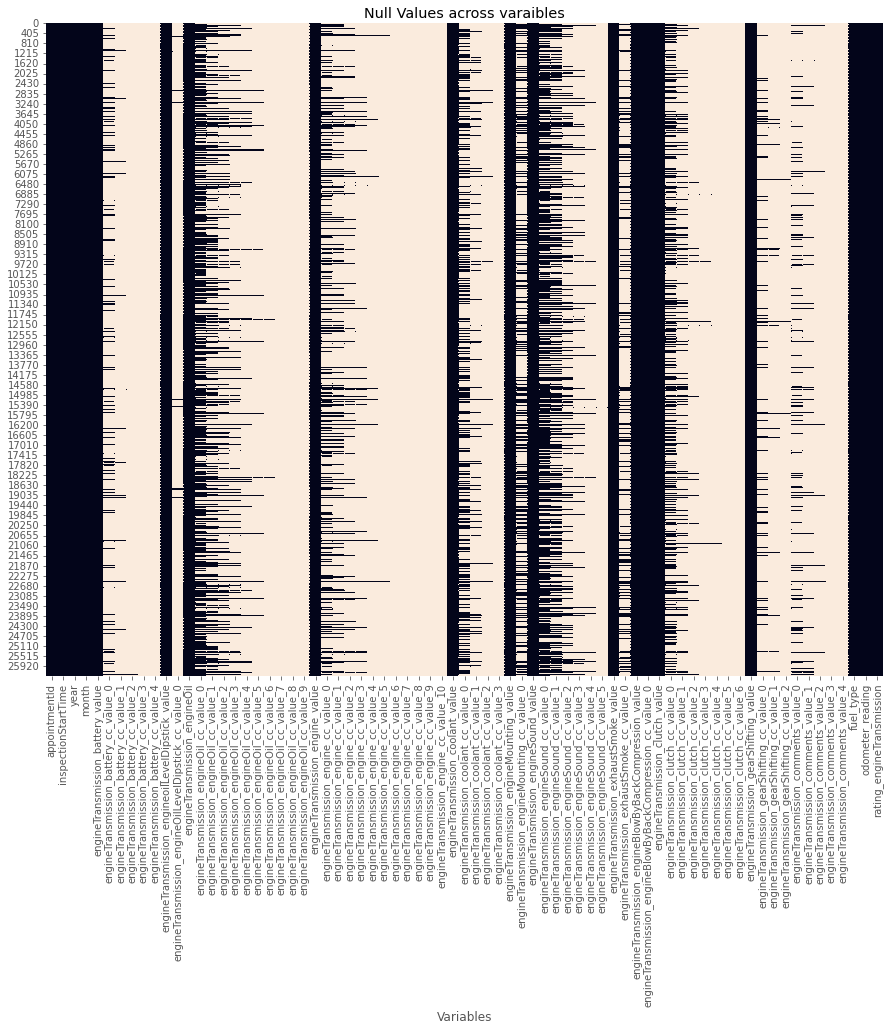

In [ ]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(15, 12))
sns.heatmap(df1.isnull(), cbar=False)
plt.xlabel("Variables")
plt.title("Null Values across varaibles")
plt.show()

Extracting the variables having more than 40% null values

In [ ]:
cols_with_more_than_40_null = df1.columns[df1.isnull().sum() * 100 / df1.shape[0] > 40]
print("Total number of variables with more than 40% null values: {}".format(len(cols_with_more_than_40_null)))

Total number of variables with more than 40% null values: 52


Understanding data better using Meta Data

In [ ]:
metadata

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
5,engineTransmission_battery_cc_value_0,current condition if not yes,Independent
6,engineTransmission_battery_cc_value_1,current condition if not yes,Independent
7,engineTransmission_battery_cc_value_2,current condition if not yes,Independent
8,engineTransmission_battery_cc_value_3,current condition if not yes,Independent
9,engineTransmission_battery_cc_value_4,current condition if not yes,Independent


From Meta Data, it seems that null values have to be imputed as "yes".

In [ ]:
# Checking the above hypothesis
set_A = set(metadata[metadata['Description'] == "current condition if not yes"]['Columns'])
set_B = set(cols_with_more_than_40_null)

# Performing an intersection of both the sets
set_A.intersection(set_B)

{'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_clutch_cc_value_2',
 'engineTransmission_clutch_cc_value_3',
 'engineTransmission_clutch_cc_value_4',
 'engineTransmission_clutch_cc_value_5',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_coolant_cc_value_2',
 'engineTransmission_coolant_cc_value_3',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineT

In [ ]:
len(set_A.intersection(set_B))

47

--47 out of 53 variables have a description of "current condition if not yes"

--Check for rest of the null variables

In [ ]:
null_var = [var for var in cols_with_more_than_40_null if var not in list(set_A.intersection(set_B))]
df1[null_var]

,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4
0,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
26302,Electrical wiring Damaged,NaN,NaN,NaN,NaN
26303,NaN,NaN,NaN,NaN,NaN
26304,NaN,NaN,NaN,NaN,NaN
26305,NaN,NaN,NaN,NaN,NaN


Rest of the null variables are just comments. These seem to be given out by human experts. It is better to avoid these variables.

In [ ]:
df1.drop(null_var, axis=1, inplace=True)                        # Dropping the comments varaibles

In [ ]:
df1 = df1.fillna("Yes")                                         # imputing the null variables with "Yes"

In [ ]:
df1.isnull().sum()                                       # Checking for null values again

appointmentId                                                0
inspectionStartTime                                          0
year                                                         0
month                                                        0
engineTransmission_battery_value                             0
engineTransmission_battery_cc_value_0                        0
engineTransmission_battery_cc_value_1                        0
engineTransmission_battery_cc_value_2                        0
engineTransmission_battery_cc_value_3                        0
engineTransmission_battery_cc_value_4                        0
engineTransmission_engineoilLevelDipstick_value              0
engineTransmission_engineOilLevelDipstick_cc_value_0         0
engineTransmission_engineOil                                 0
engineTransmission_engineOil_cc_value_0                      0
engineTransmission_engineOil_cc_value_1                      0
engineTransmission_engineOil_cc_value_2                


BASIC METRICS SUMMARY

1. There are a total 26307 rows & 73 columns (including target variable).

2. The total columns is to total rows ratio is 0.0027369141293191925.

3. 52 columns/ variables (~72.22%) have more than 40% missing values.

4. Out of these 52 columns 47 are imputed with a constant value of "Yes" which is inferred from the given data dictionary.

5. Rest 5 values were comments which seemed like were given by human experts & hence, are dropped from the set and will not be considered for further analysis.

6. Out of the remaining 68 variables, 63 are of categorical type (~92.6% of total) & 5 are continuous columns (including the target variable).

Exploratory Data Analysis:

In [ ]:
df1.describe()

,year,month,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,26307.000000,26307.000000
mean,2010.856578,5.462006,76460.143764,3.624663
std,3.766234,3.583866,46762.524489,0.847645
min,1989.000000,1.000000,1.000000,0.500000
25%,2008.000000,2.000000,46396.000000,3.500000
50%,2011.000000,5.000000,72013.000000,4.000000
75%,2014.000000,9.000000,98289.500000,4.000000
max,2019.000000,12.000000,999999.000000,5.000000


From the above summary, it can be inferred that

1. We have data of vehicles which have registerations from year 1989 to 2019.

2. Minimum reading in the odometer is 1KM & maximum is 999999.000000 (which seems a little too hight, this will be evaluated further).

3. The average vehicle engine rating is 3.62.

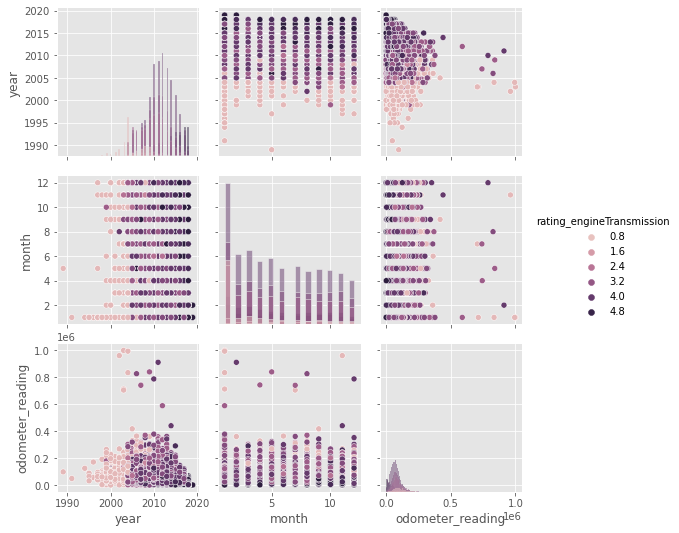

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.pairplot(df1, hue="rating_engineTransmission", diag_kind="hist")


Univariate Analysis

In [ ]:
min_timestamp = df1['inspectionStartTime'].min()                       #  inspectionStartTime
max_timestamp = df1['inspectionStartTime'].max()
print(min_timestamp, max_timestamp)                                    # The inspection data is from  January 2019 through  April 2019.

1/10/19 10:18 4/9/19 19:44


Convert to appropriate data types

In [ ]:
df1[['year',	'month']] = df1[['year',	'month']].astype(int)

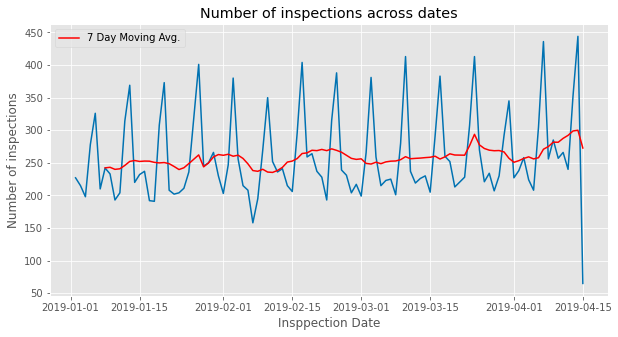

In [ ]:
inspectionDate = pd.to_datetime(df1['inspectionStartTime']).dt.date          # 1. Extract the inspection month, day, dayofweek & hour
inspectionMonth = pd.to_datetime(df1['inspectionStartTime']).dt.month
inspectionDay = pd.to_datetime(df1['inspectionStartTime']).dt.day
inspectionWeekDay = pd.to_datetime(df1['inspectionStartTime']).dt.dayofweek
inspectionHour = pd.to_datetime(df1['inspectionStartTime']).dt.hour

df1.insert(2,'inspectionDate', inspectionDate)               # Insert into the dataframe
df1.insert(3,'inspectionMonth', inspectionMonth)
df1.insert(4,'inspectionDay', inspectionDay)
df1.insert(5,'inspectionWeekDay', inspectionWeekDay)
df1.insert(6,'inspectionHour', inspectionHour)

plt.style.use('seaborn-colorblind')                         # 2. visualise inspections by Date
plt.figure(figsize=(10, 5))
plt.plot(df1.groupby('inspectionDate').count()['appointmentId'])
df1.groupby('inspectionDate').count()['appointmentId'].rolling(7).mean().plot(label='7 Day Moving Avg.', color='red')
plt.xlabel("Insppection Date")
plt.ylabel("Number of inspections")
plt.title("Number of inspections across dates")
plt.legend()
plt.show()

Average daily inspections (for this sample): 257.9117647058824
We have inspection data for 102 dates


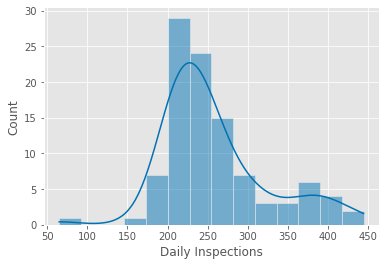

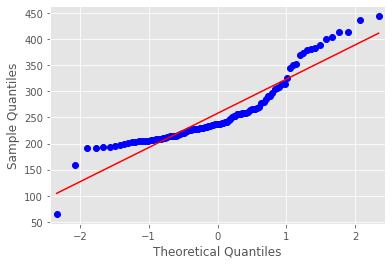

In [ ]:
daily_avg = df1.groupby('inspectionDate').count()['appointmentId'].mean()    # Cacluating the daily average
print("Average daily inspections (for this sample): {}".format(daily_avg))

total_dates = df1.groupby('inspectionDate').count()['appointmentId'].shape[0]    # Total number of dates
print("We have inspection data for {} dates".format(total_dates))

sns.histplot(df1.groupby('inspectionDate').count()['appointmentId'], kde=True)    # Daily Inspections histogram
plt.xlabel("Daily Inspections")
plt.show()
import statsmodels.api as sm
sm.qqplot(df1.groupby('inspectionDate').count()['appointmentId'], line='s')  # plotting the qqplots
plt.show()

Performing a similar analysis across months, days & weekdays

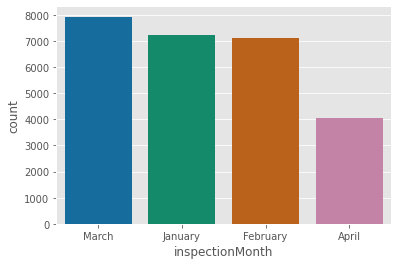

In [ ]:
sns.countplot(data=df1, x='inspectionMonth', order=[3, 1, 2, 4])
plt.xticks(np.arange(0,4), labels = ["March", "January", "February", "April"])
plt.show()

     Months  Distribution(%)
0     March        30.125062
1   January        27.426160
2  February        27.011822
3     April        15.436956


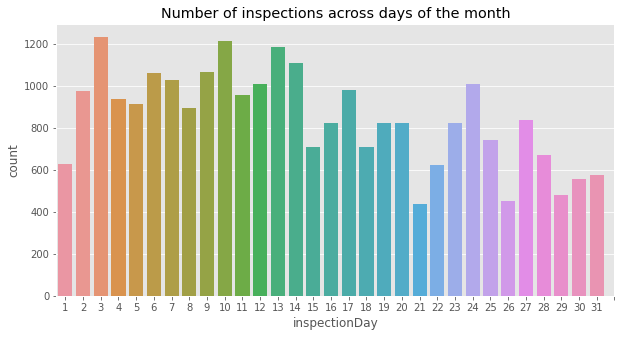

In [ ]:
month_dict = {1 : "January", 2 : "February",3 : "March", 4 : "April"}
perc_data = (df1['inspectionMonth'].value_counts() * 100 / df1.shape[0]).to_frame()\
                                                                            .reset_index()\
                                                                            .rename(columns = {'index' : 'Months', 'inspectionMonth' : 'Distribution(%)'})
perc_data['Months'] = perc_data['Months'].map(month_dict)
print(perc_data)

plt.figure(figsize=(10,5))                                     # Visualising number of inspections across Day of Month & Dat of Week
sns.countplot(data=df1,x='inspectionDay')
plt.title("Number of inspections across days of the month")
plt.xticks(np.arange(0, 32))
plt.show()

--Few high spikes of inspections can be seen on 3rd, 10th, & 14th of the month.

inspectionWeekDay
0    3463
1    3302
2    3468
3    3011
4    3137
5    4120
6    5806
Name: appointmentId, dtype: int64
Average Weekly Inspections: 3758.1428571428573
Average inspections on Weekends: 4963.0


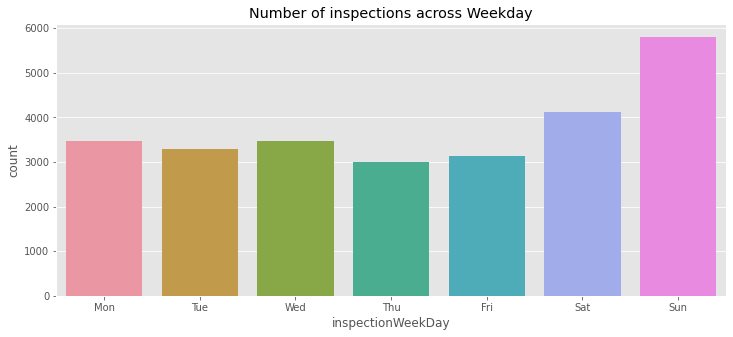

In [ ]:
print(df1.groupby("inspectionWeekDay").count()['appointmentId'])
avg_weekly_inspections = df1.groupby("inspectionWeekDay").count()['appointmentId'].mean()      # Computing the average weekly inspections
inspections_on_weekend = df1.groupby("inspectionWeekDay").get_group(5).shape[0] + df1.groupby("inspectionWeekDay").get_group(6).shape[0]
print("Average Weekly Inspections: {}".format(avg_weekly_inspections))
print("Average inspections on Weekends: {}".format(inspections_on_weekend/2))
plt.figure(figsize=(12,5))
sns.countplot(data=df1,x='inspectionWeekDay')
plt.title("Number of inspections across Weekday")
plt.xticks(np.arange(0, 7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Clearly, there are more inspections on Weekends.
Average inspections on weekend is greather than weekly average inspeactions by 32%.

15    14.167332
16    14.000076
13    13.661763
12    13.251226
14    13.026951
11    10.719580
17     9.522180
10     6.431748
18     3.527578
19     1.098567
9      0.440947
20     0.136846
21     0.015205
Name: inspectionHour, dtype: float64


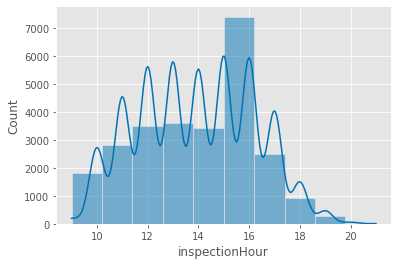

In [ ]:
print(df1['inspectionHour'].value_counts() * 100 / df1.shape[0])
sns.histplot(data=df1, x='inspectionHour', kde=True, bins=10)
plt.show()

DATE TIME SUMMARY:

1. Monthly representation is maximum for March (~ 30%) followed by January (~ 27.4%), February(~ 27%) & April (~ 15.4%).

2. High spikes in inspections can be seen on 3rd, 10th, & 14th of the month.

3. Average inspections on weekend is greater than the overall weekly average inspections by ~ 32 %.

4. There's a spike in number of inspections across from 15:00 - 16:00.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


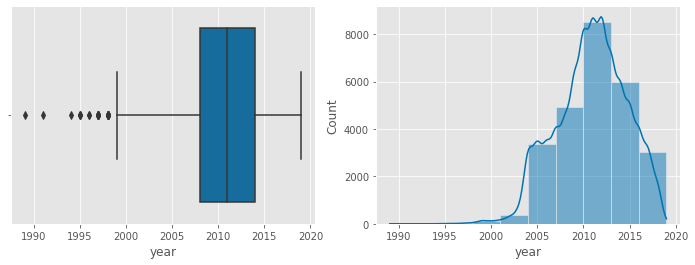

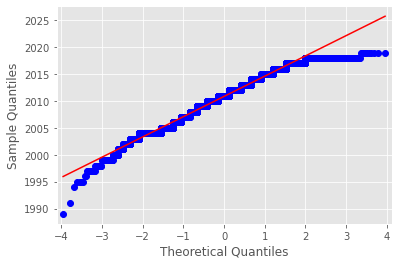

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))             # Year: registeration year
sns.boxplot(df1['year'], ax=ax[0])
sns.histplot(df1['year'], bins=10, kde=True, ax=ax[1])
plt.show()

sm.qqplot(df1['year'], line='s')
plt.show()

It appears there are a few outliers in the year column.

In [ ]:
def remove_outlier(df, col):                     # Removing outlier using IQR

  # 1. Compute Quantiles
  q1 = np.quantile(df[col], .25)
  q3 = np.quantile(df[col], .75)

  IQR = q3 - q1

  # 2. Compute the upper & lower limit
  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  return df[(df[col] < upper_limit) & (df[col] > lower_limit)]

df1 = remove_outlier(df1, 'year')

   Registration_Month  Distribution{%}
0                 Jan        19.568367
1                 Mar         9.475330
2                 Feb         8.735606
3                 May         8.186532
4                 Apr         7.850988
5                 Jul         7.092199
6                 Jun         6.966369
7                 Sep         6.783345
8                 Aug         6.768093
9                 Oct         6.756654
10                Nov         6.588881
11                Dec         5.227637


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


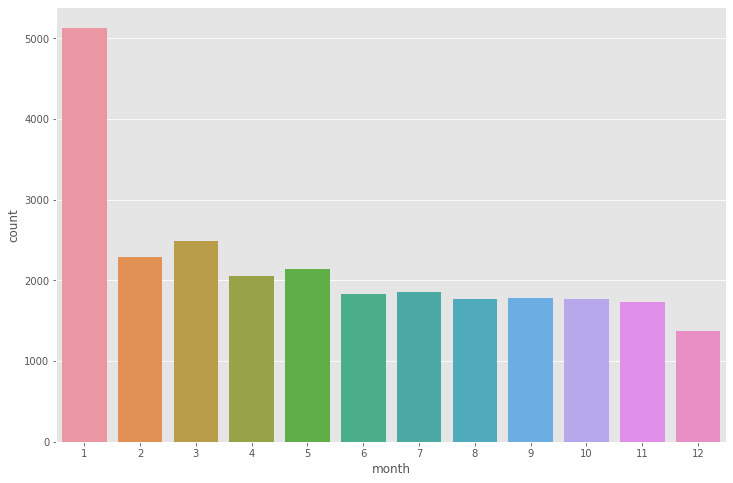

In [ ]:
# Create a monthly mapping
month_mapping = {1 : "Jan",2 : "Feb",3 : "Mar",4 : "Apr",5 : "May",6 : "Jun",7 : "Jul",8 : "Aug",9 : "Sep",10 : "Oct",11 : "Nov",12 : "Dec"}
month_perc_data = (df1['month'].value_counts() * 100 / df1.shape[0]).to_frame().reset_index()\
                                                                                              .rename(columns = {'index' : 'Registration_Month', 'month' : 'Distribution{%}'})
month_perc_data['Registration_Month'] = month_perc_data['Registration_Month'].apply(lambda x : month_mapping[x])
print(month_perc_data)
plt.figure(figsize=(12, 8))                  # month: registeration month
sns.countplot(df1['month'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

ValueError: ignored

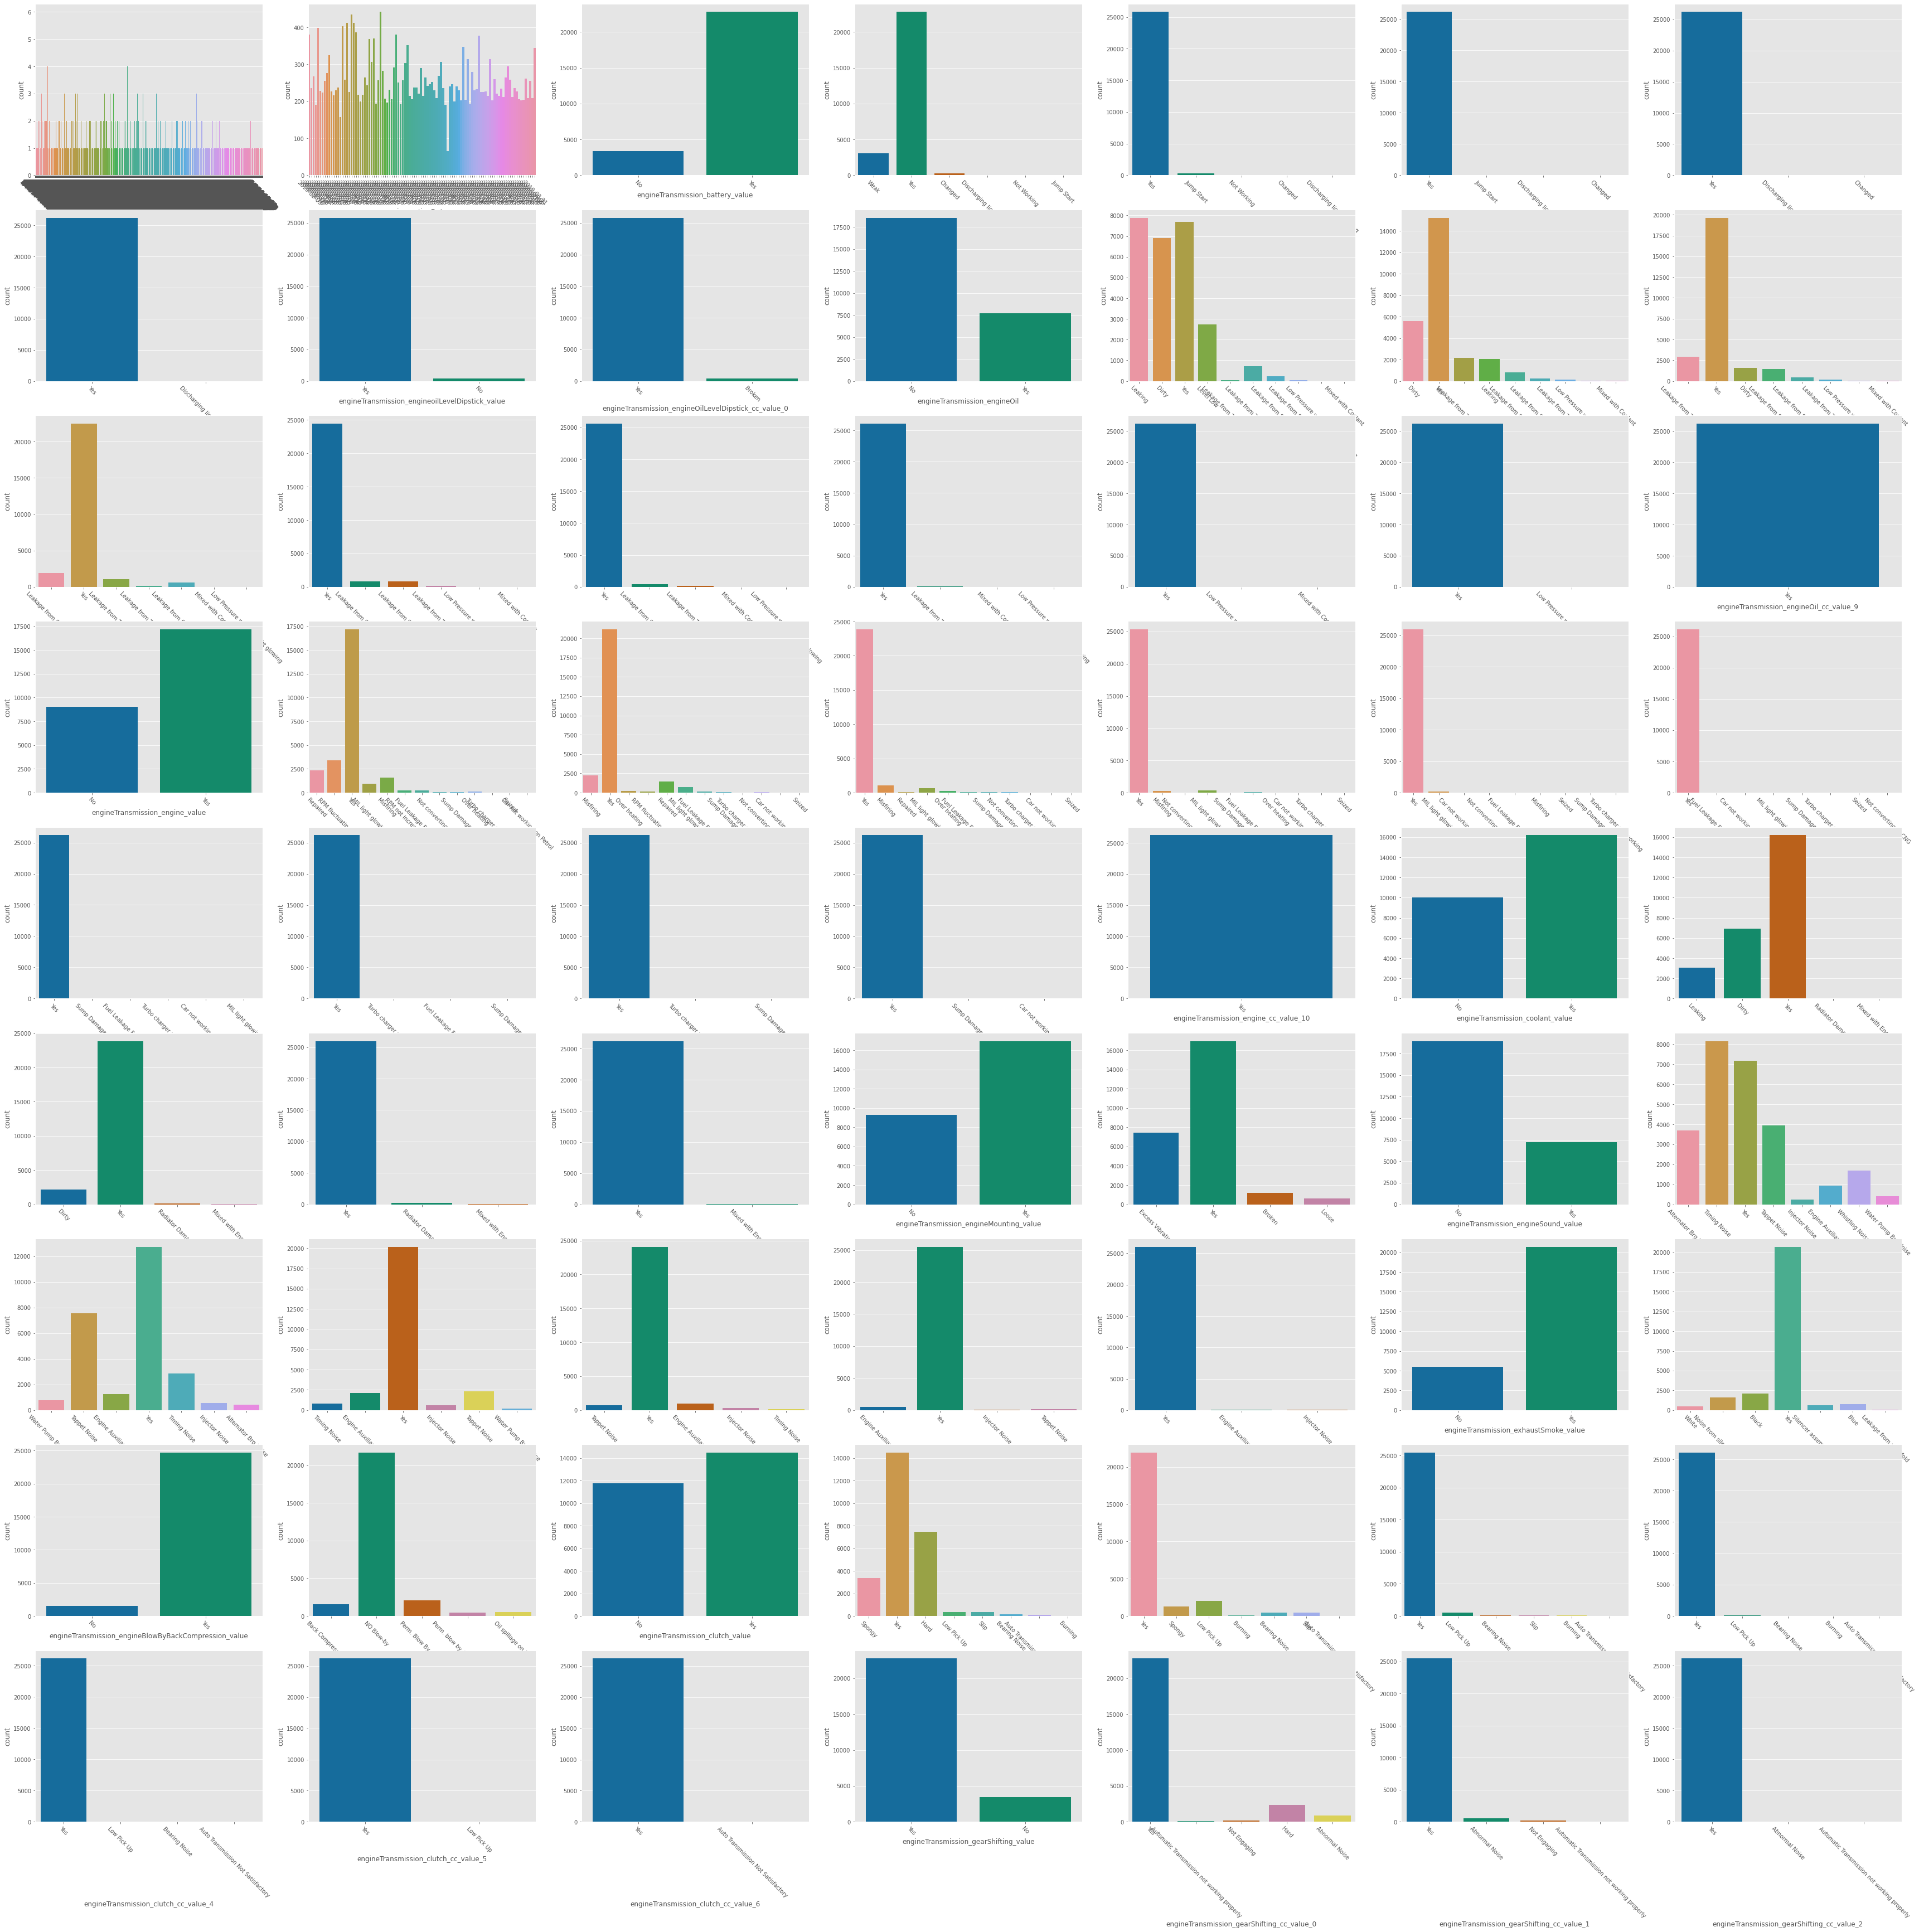

In [ ]:
categorical_columns = df1.select_dtypes('O').columns                 # Checking for categorical variables & continuous variables
continuous_columns = [cols for cols in df1.columns if cols not in categorical_columns]
categorical_columns = categorical_columns.drop('appointmentId')

fig = plt.figure(figsize=(60, 60))                                    # Next we have a set of categorical columns, plotting the count distribution
for i, col in enumerate(categorical_columns):
  plt.subplot(9, 7, i+1)
  sns.countplot(df1[col])
  plt.xticks(rotation=-45)
plt.show()

A lot of variables have categroies with very high frequency.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


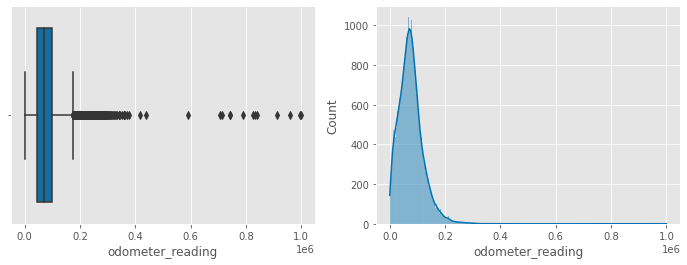

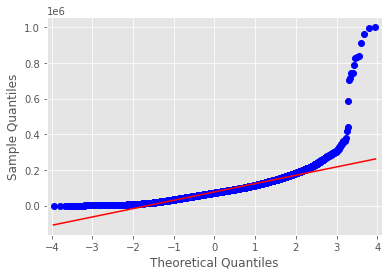

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))            # odometer_reading
sns.boxplot(df1['odometer_reading'], ax=ax[0])
sns.histplot(df1['odometer_reading'], kde=True, ax=ax[1])
plt.show()
sm.qqplot(df1['odometer_reading'], line='s')
plt.show()

Odometer has right skewed observation with a lot of outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


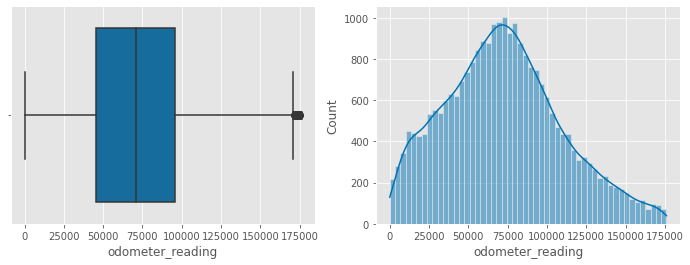

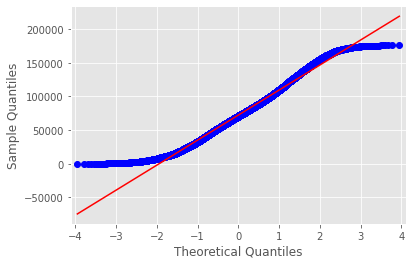

In [ ]:
df1 = remove_outlier(df1, 'odometer_reading')    # Removing outliers using IQR
fig, ax = plt.subplots(1, 2, figsize=(12, 4))                    # odometer_reading
sns.boxplot(df1['odometer_reading'], ax=ax[0])
sns.histplot(df1['odometer_reading'], kde=True, ax=ax[1])
plt.show()
sm.qqplot(df1['odometer_reading'], line='s')
plt.show()

visualise the target i.e dependent variable

4.0    39.033472
3.5    22.634632
3.0    16.469389
4.5     8.603120
5.0     6.353375
1.0     4.863996
2.5     1.575606
2.0     0.438975
1.5     0.023517
0.5     0.003919
Name: rating_engineTransmission, dtype: float64


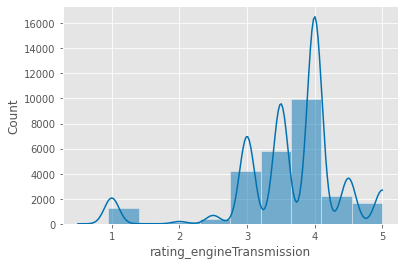

In [ ]:
print(df1['rating_engineTransmission'].value_counts() * 100 / df1.shape[0])
sns.histplot(data=df1, x='rating_engineTransmission', bins=10, kde=True)    # rating_engineTransmission
plt.show()

rating_engineTransmission 0.5, 1.5 & 2.0 have a very low count (less than 1%).


Bivariate Analysis

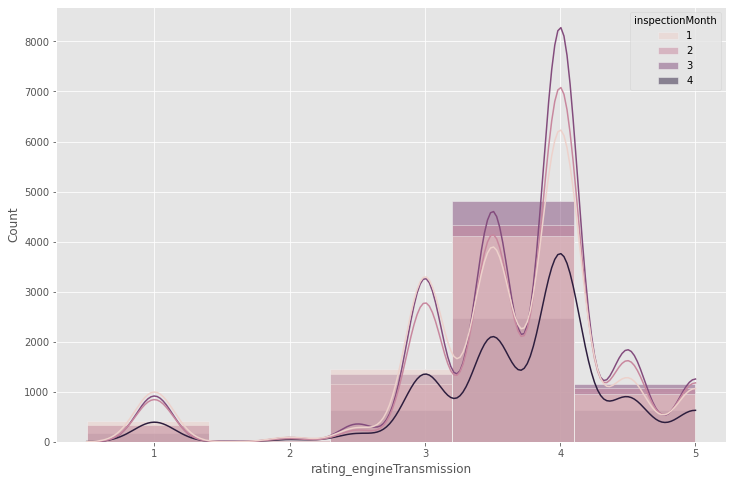

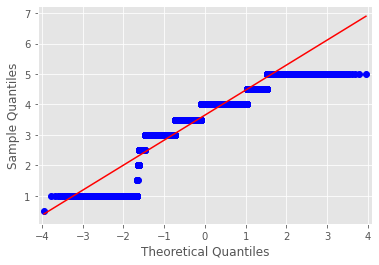

In [ ]:
df1.drop(['appointmentId', 'inspectionStartTime', 'inspectionDate',               # Dropping appointmentId, inspectionStartTime & inspectionDate variables
          'inspectionDay', 'inspectionWeekDay'], axis=1, inplace=True)

plt.figure(figsize=(12, 8))                      # Inspection month v/s rating_engineTransmission
sns.histplot(data=df1, x='rating_engineTransmission', bins=5, hue='inspectionMonth', kde=True)
plt.show()
sm.qqplot(df1['rating_engineTransmission'], line='s')
plt.show()

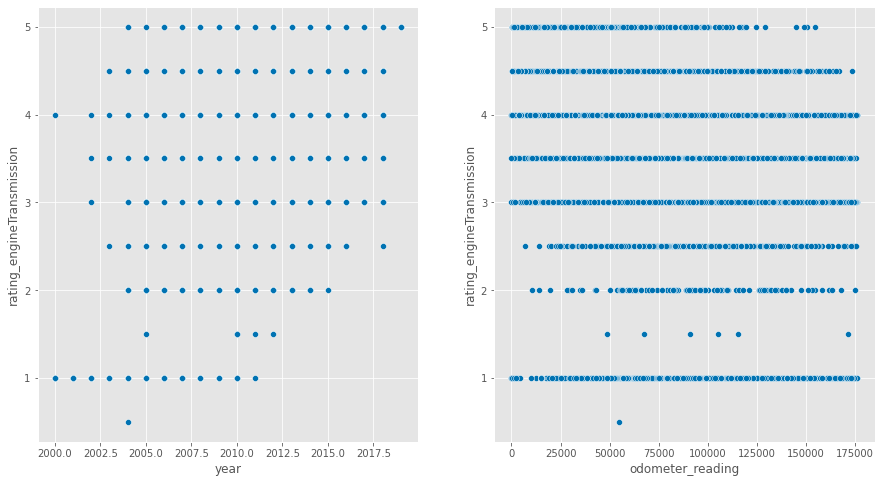

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(data=df1, x='year', y='rating_engineTransmission', ax=ax[0])
sns.scatterplot(data=df1, x='odometer_reading', y='rating_engineTransmission', ax=ax[1])
plt.show()

Generate scatter plot of independent vs Dependent variable to understand correlation

IndexError: ignored

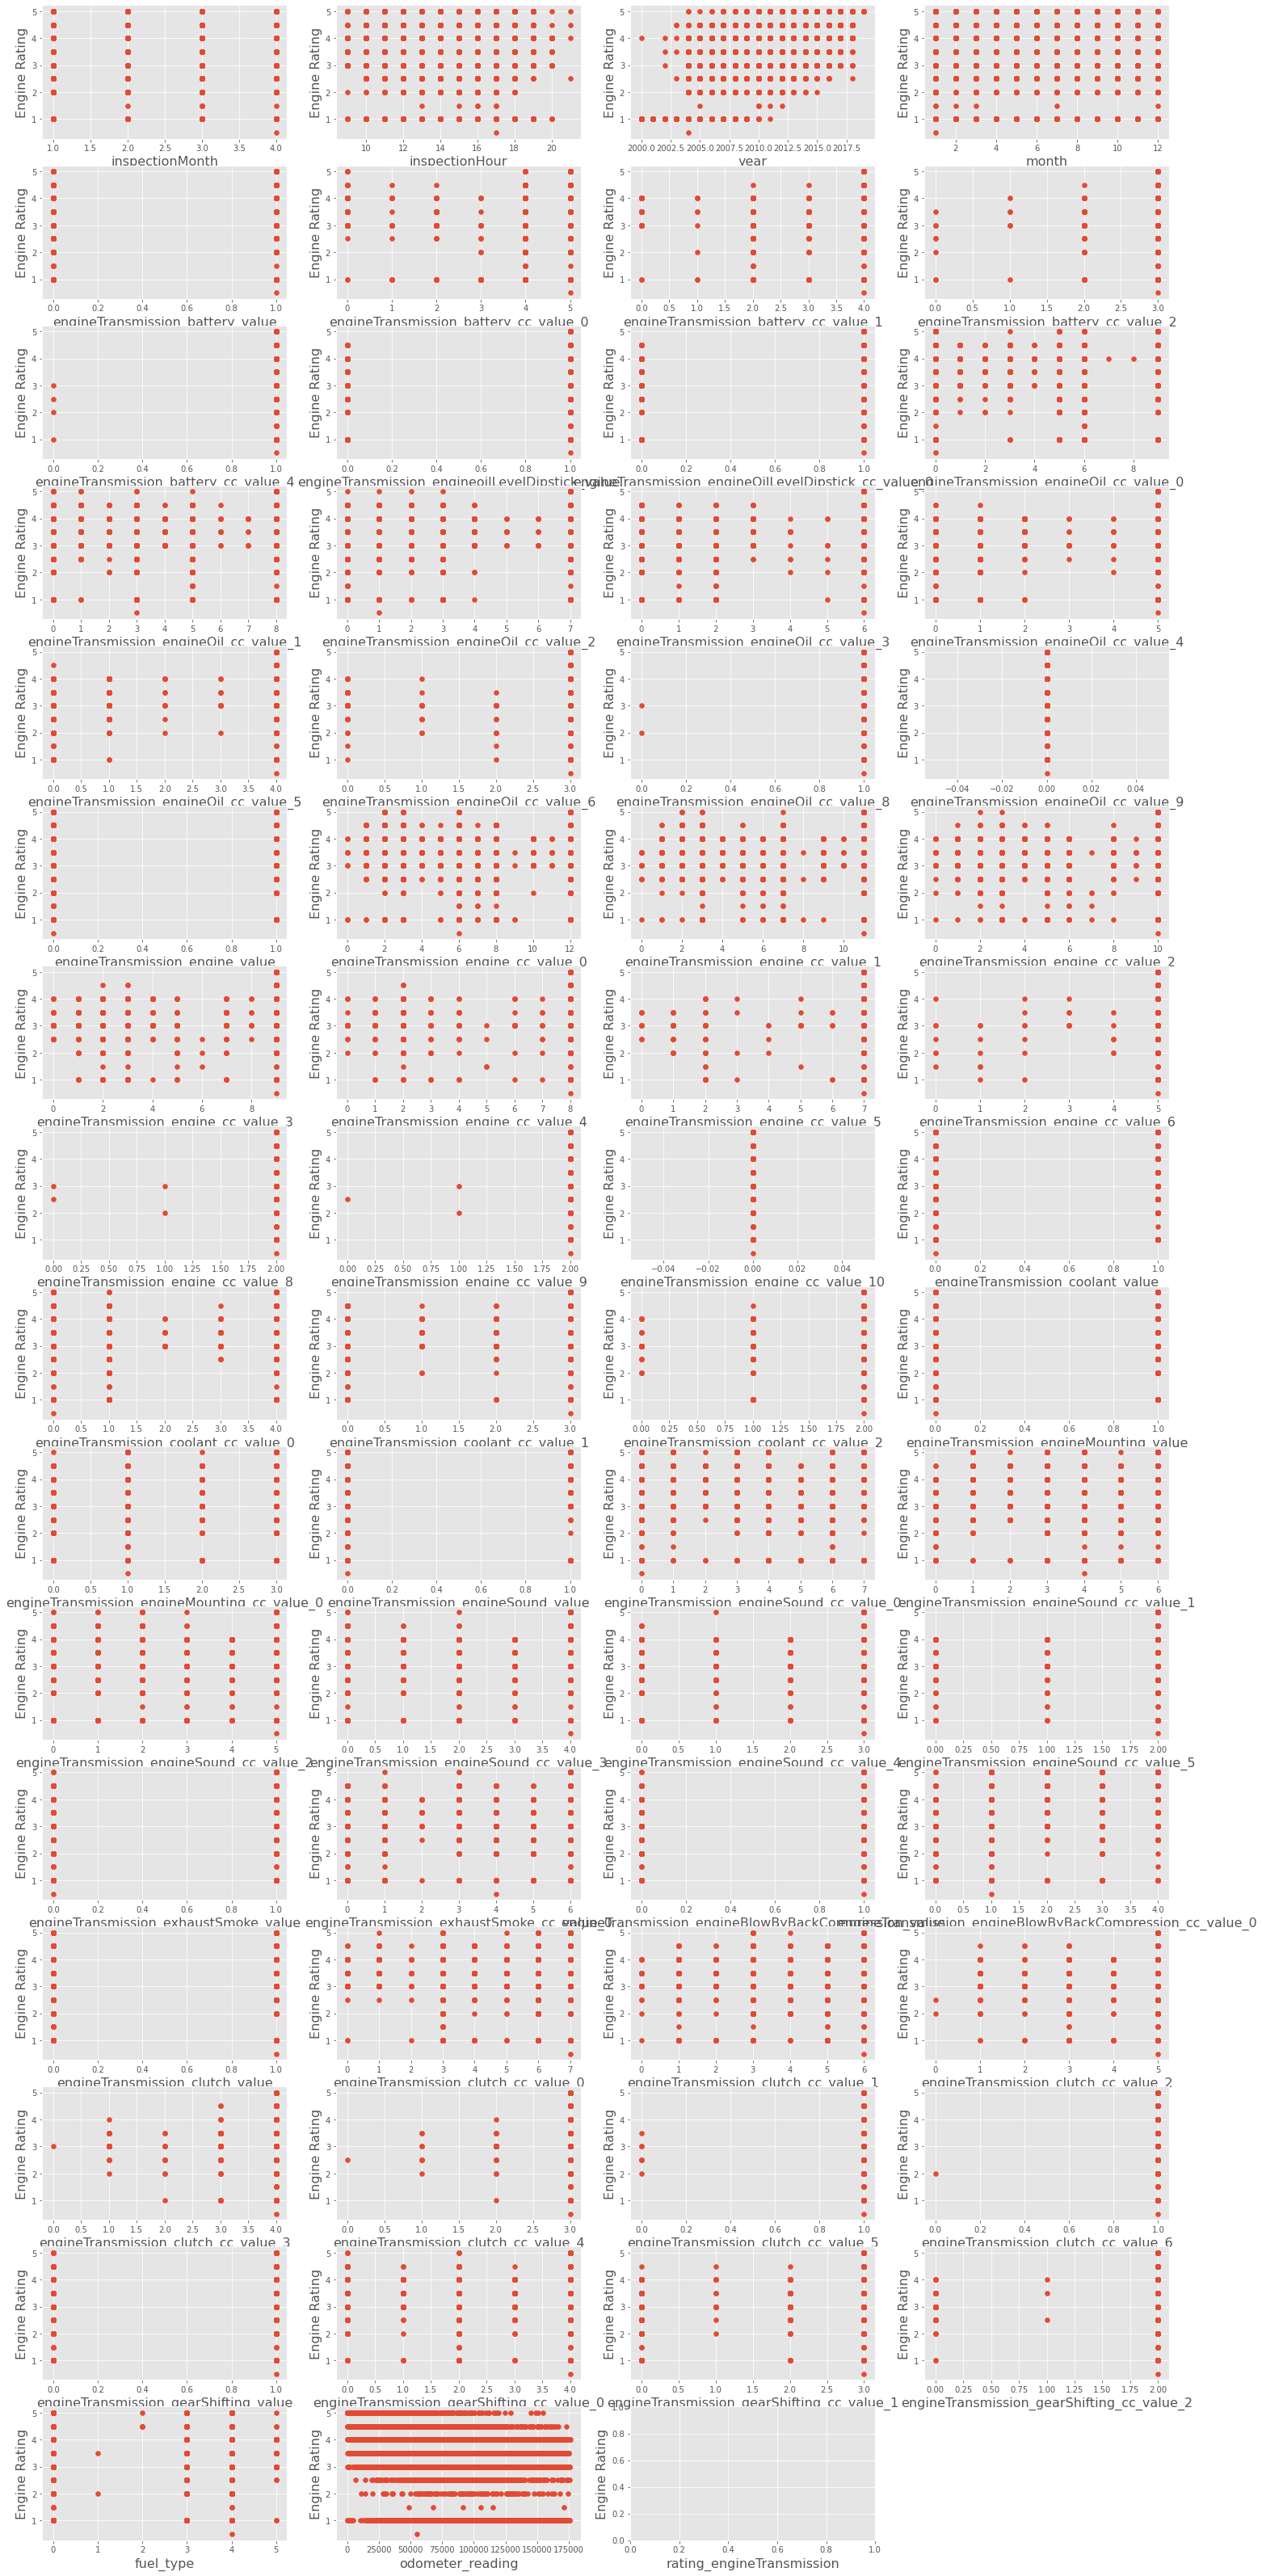

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (25, 65))

X = df1.drop(['rating_engineTransmission'],axis=1).values   
y = df1['rating_engineTransmission'].values		
 
for index, feature_name in enumerate(df1.columns):
    ax = fig.add_subplot(18, 4, index + 1)
    ax.set_ylabel('Engine Rating', size =16)
    ax.set_xlabel(feature_name,size =16)
    ax.scatter(X[:, index], y)
    # ax.set_ylabel('Engine Rating', size =12)
    # ax.set_xlabel(feature_name,size =12)
plt.show()

The rating_engineTransmission appears to be more of a discrete variable.

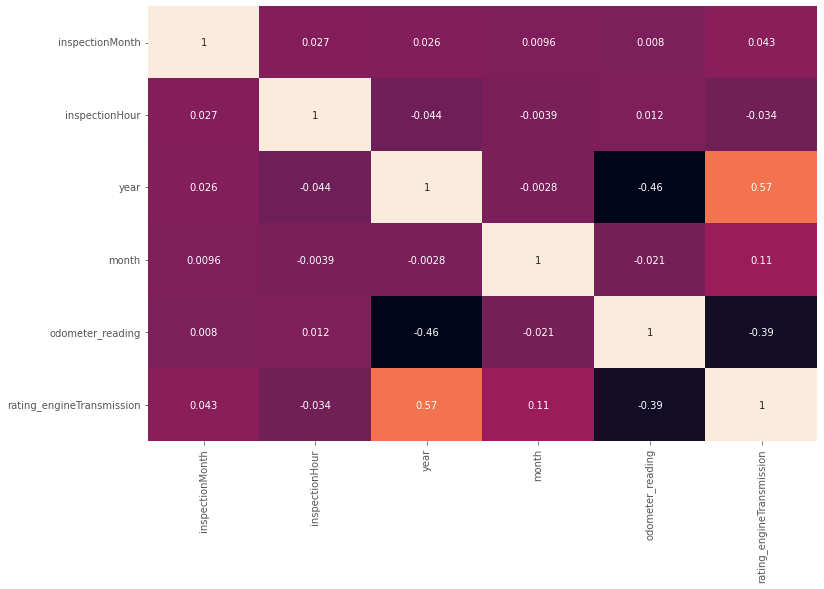

In [ ]:
corr_matrix = df1.corr()               # Visualising pearson's correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

year (registration year) & odometer_reading has significant negative correlation with the rating_engineTransmission.

Label Encoding for categorical columns

In [ ]:
for i in df1.columns:
    if(df1[i].dtype == 'object'):
        df1[i]= df1[i].astype('category')
        df1[i] = df1[i].cat.codes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25514 entries, 0 to 26306
Data columns (total 68 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   inspectionMonth                                            25514 non-null  int64  
 1   inspectionHour                                             25514 non-null  int64  
 2   year                                                       25514 non-null  int64  
 3   month                                                      25514 non-null  int64  
 4   engineTransmission_battery_value                           25514 non-null  int8   
 5   engineTransmission_battery_cc_value_0                      25514 non-null  int8   
 6   engineTransmission_battery_cc_value_1                      25514 non-null  int8   
 7   engineTransmission_battery_cc_value_2                      25514 non-null  int8   
 8   engine

Correlation Score with respect to target i.e engine rating

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cor = pd.DataFrame(df1.corr()['rating_engineTransmission'].sort_values())    # correlation
cor

,rating_engineTransmission
odometer_reading,-0.388122
fuel_type,-0.061942
engineTransmission_engineOil_cc_value_0,-0.046248
inspectionHour,-0.034479
engineTransmission_engineOil_cc_value_8,0.012378
engineTransmission_clutch_cc_value_6,0.012559
engineTransmission_engine_cc_value_8,0.014199
engineTransmission_engine_cc_value_9,0.014293
engineTransmission_clutch_cc_value_5,0.018842
engineTransmission_battery_cc_value_4,0.023215


Dropping columns that are least correlated (between -0.02 to 0.02 correlation score)

In [ ]:
drop = ['engineTransmission_coolant_cc_value_3','engineTransmission_battery_cc_value_3','engineTransmission_engine_cc_value_7','engineTransmission_engineOil_cc_value_7',	'engineTransmission_engineOil']
df1.drop(columns = drop,inplace = True)
df1.shape

(25514, 63)

Box plot for top 5 correlated columns

,inspectionMonth,inspectionHour,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,fuel_type,odometer_reading,rating_engineTransmission
count,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.0,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.0,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000,25514.000000
mean,2.338363,13.908717,2010.963157,5.464451,0.871835,4.829937,3.968880,2.996629,0.999843,0.984479,0.984479,4.850984,5.390413,5.713843,5.287176,4.715607,3.917731,2.988673,0.999922,0.0,0.657325,9.766520,9.694481,9.393470,8.793839,7.939994,6.984949,4.995924,1.999765,1.999843,0.0,0.620757,2.603355,2.746218,1.990476,0.648389,2.274869,0.278004,4.126323,4.469115,4.178529,3.761112,2.933762,1.988986,0.792506,5.143999,0.942541,1.169358,0.554010,5.614917,5.590695,4.933762,3.991377,2.998158,0.999726,0.999961,0.870738,3.679705,2.929568,1.995493,2.100886,72308.261739,3.649624
std,1.038775,2.280873,3.700299,3.579395,0.334280,0.579747,0.263639,0.075573,0.012520,0.123615,0.123615,3.424210,3.359035,2.336839,1.811794,1.091194,0.550877,0.177269,0.008854,0.0,0.474613,3.353652,2.841751,1.999421,1.152598,0.597658,0.282092,0.122615,0.019797,0.015335,0.0,0.485208,1.812519,0.828058

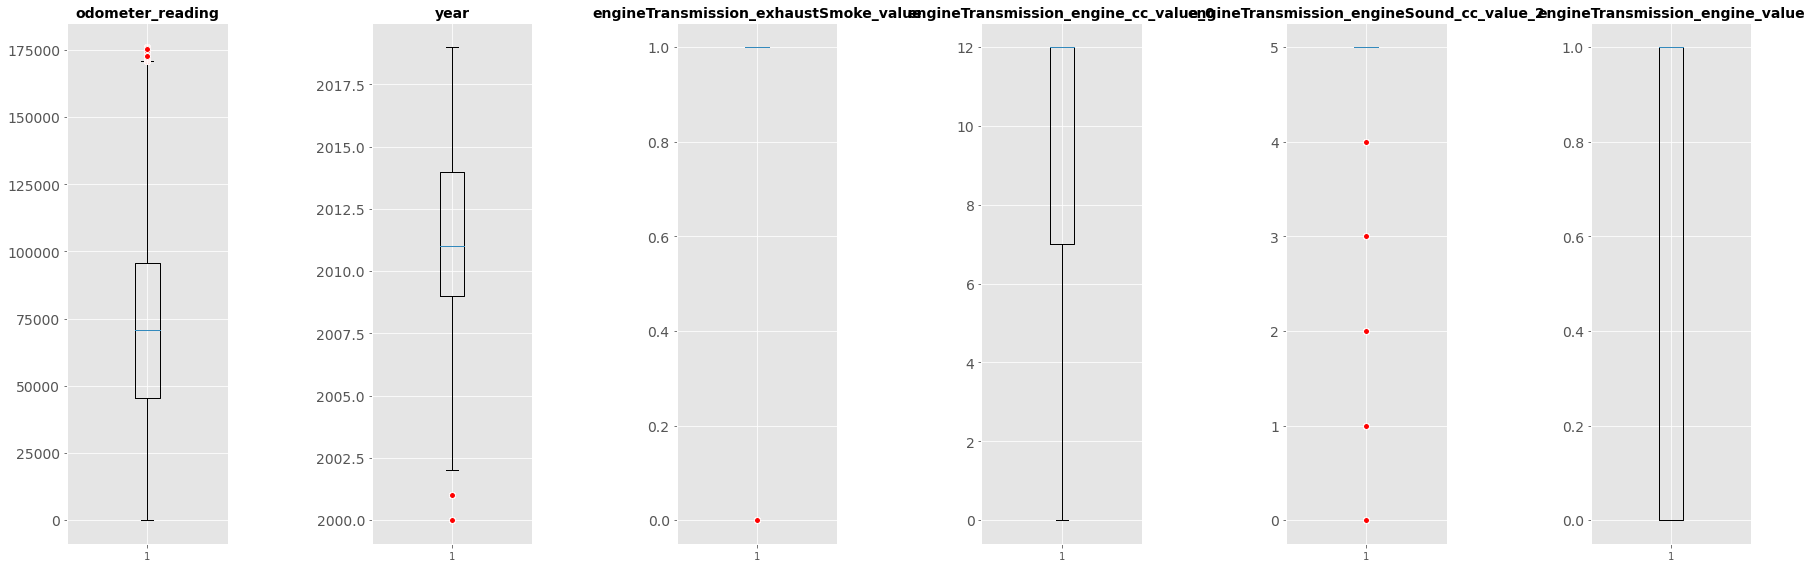

In [ ]:
box =df1[['odometer_reading','year','engineTransmission_exhaustSmoke_value','engineTransmission_engine_cc_value_0','engineTransmission_engineSound_cc_value_2',
          'engineTransmission_engine_value']]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(box.columns), figsize=(25,8))

for i, ax in enumerate(axs.flat):
    ax.boxplot(box.iloc[:,i].values, flierprops=red_circle)
    ax.set_title(box.columns[i], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
df1.describe()

Train test split

In [ ]:
from sklearn.model_selection import train_test_split		
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training Multiple linear regression

In [ ]:
model = LinearRegression().fit(X_train, y_train)                                          # Apply multiple Linear Regression Model
y_pred = model.predict(X_test)                                                            # Generate Prediction on test set

print("MSE of test set : ", mean_squared_error(y_test, y_pred))                         # calculating Mean Squared Error (mse)
print("MSE of train set : ", mean_squared_error(y_train, model.predict(X_train)))
print("R squared value on test set (R^2) : ", r2_score(y_test, y_pred)) 
print("R squared value on train set (R^2) : ", r2_score(y_train, model.predict(X_train)))

MSE of test set :  0.3977395932825105
MSE of train set :  0.4034601540237144
R squared value on test set (R^2) :  0.40698069148319416
R squared value on train set (R^2) :  0.4050172144991433


Accuracy seems low. Hence, I'll train different algorithms after scaling the data & reducing dimensionality using Principle Component Analysis

Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit(df1)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaled.transform(df1)

Dimensionality reduction: Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
PCA(copy=True, n_components=2, whiten=False)

x_pca = pca.transform(scaled_data)
scaled_data.shape
print(x_pca.shape)

(25514, 2)


Below heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

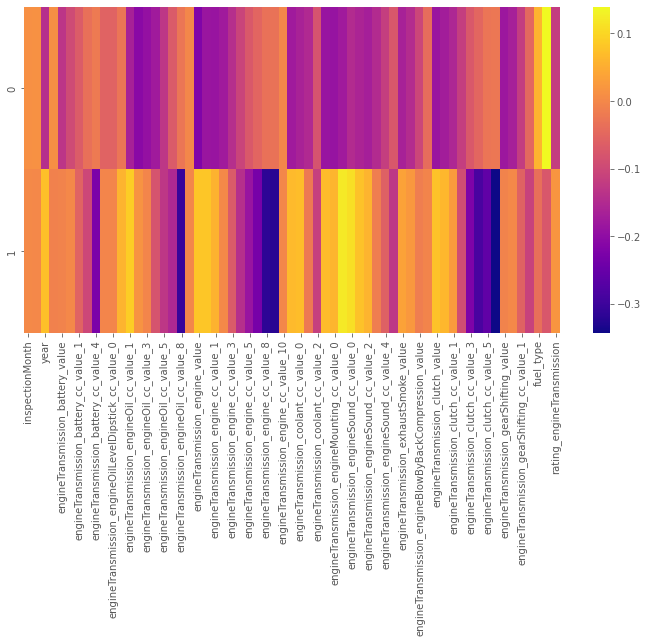

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

df_comp = pd.DataFrame(pca.components_,columns=df1.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Elbow curve for PCA: Finding best number of features that explain maximum variability


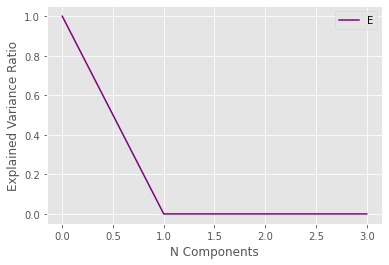

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_, color = 'purple')
plt.legend('Explained Variance')
plt.xlabel('N Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Variability Explained by the features after PCA along with cumulative Sum

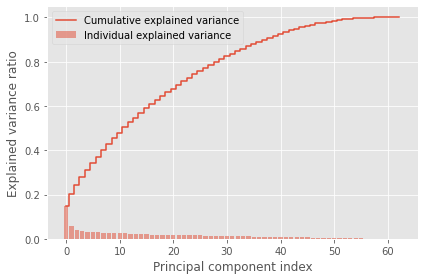

In [ ]:
from numpy.linalg import eigh           # Import eigh method for calculating eigenvalues and eigenvectors
cov_matrix = np.cov(scaled_data, rowvar=False)   # Determine covariance matrix
egnvalues, egnvectors = eigh(cov_matrix)          # Determine eigenvalues and eigenvectors
total_egnvalues = sum(egnvalues)          # Determine explained variance
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

import matplotlib.pyplot as plt            # Plot the explained variance against cumulative explained variance
cum_sum_exp = np.cumsum(var_exp) 
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the above graph, nearly 50% variance is explained by only 4 or 5 features.

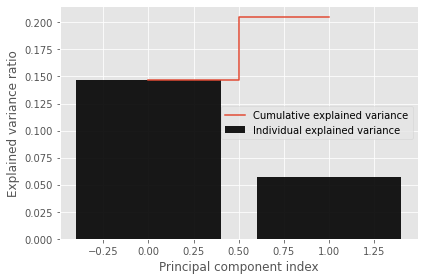

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.9, align='center', label='Individual explained variance',color="black")
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(25514, 2)


Text(0, 0.5, 'Second Principal Component')

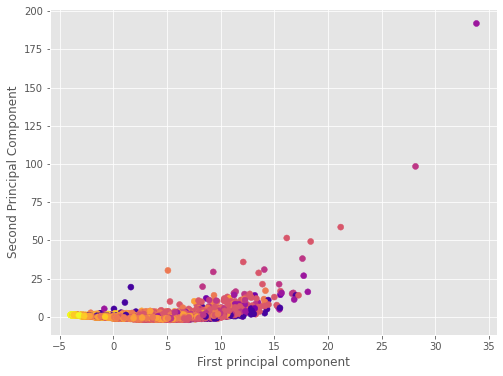

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
PCA(copy=True, n_components=2, whiten=False)

x_pca = pca.transform(scaled_data)
scaled_data.shape
print(x_pca.shape)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['rating_engineTransmission'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
X = pd.DataFrame(x_pca)
y = pd.DataFrame(df1['rating_engineTransmission'].values, columns =['engine_rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor   
model = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)
y_predict_rfr = model.predict(X_test)
                                                                                                      
#Model Evaluation using R-Square for Random Forest Regression
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression on test set:', r_square)
print('R-Square Error associated with Random Forest Regression on train set:', metrics.r2_score(y_train, model.predict(X_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R-Square Error associated with Random Forest Regression on test set: 0.5043666434303005
R-Square Error associated with Random Forest Regression on train set: 0.9282111126236892


After performing Bagging technique using Random Forest Regression, accuracy increased to 50% (previously it was only 40%)

But it is clearly overfitting since Train accuracy > Test accuracy

Feature Importance 

Text(0.5, 0, 'Relative Importance')

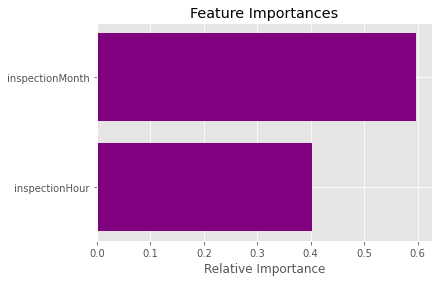

In [ ]:
features=df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Only 2 feature importances are plotted because we have only 2 principle components

Let's try again without PCA

In [ ]:
X = df1.drop(['rating_engineTransmission'],axis=1).values   
y = df1['rating_engineTransmission'].values			
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train, y_train)
y_predict_rfr = model.predict(X_test)
                                                                                                      
#Model Evaluation using R-Square for Random Forest Regression
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression on test set:', r_square)
print('R-Square Error associated with Random Forest Regression on train set:', metrics.r2_score(y_train, model.predict(X_train)))

R-Square Error associated with Random Forest Regression on test set: 0.7099039715041662
R-Square Error associated with Random Forest Regression on train set: 0.959326915809072


Accuracy has increased but it still over fits

Extreme Gradient Boosting

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor().fit(X_train, y_train)
print(f'train accuracy: {xgb.score(X_train, y_train)}, test acciracy: {xgb.score(X_test, y_test)}')

[19:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train accuracy: 0.6908703913526411, test acciracy: 0.6804467068137152


Accuracy is still not satisfactory

Trying Light Gradient Boosting

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor().fit(X_train, y_train)
print(f'train accuracy: {lgbm.score(X_train, y_train)}, test acciracy: {lgbm.score(X_test, y_test)}')

train accuracy: 0.7728664449423179, test acciracy: 0.726681079077295


Performance improved after Ligh GB. Now lets try to hyper tune using Grid Search CV

Perform Grid Search CV on XGBoost for best parameters

In [ ]:
# Tuning the XGBoost model
# Using RandomizedSearchCV for hyperparameter tuning
parameters = {'max_depth': [3, 5, 6, 10, 15, 20],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}

xgb = xg.XGBRegressor()
rscv_xgb = RandomizedSearchCV(xgb, parameters, n_iter=5,scoring='r2', verbose=30, n_jobs=-1, cv=3, random_state=42)
rscv_xgb.fit(X_train, y_train)
xgb_best_est = rscv_xgb.best_estimator_
xgb_best_est.fit(X_train, y_train)
print(f'train accuracy after getting best parameters via CV: {xgb_best_est.score(X_train, y_train)}, test accuracy after CV: {xgb_best_est.score(X_test, y_test)}')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[19:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train accuracy after getting best parameters via CV: 0.9667426390206119, test accuracy after CV: 0.7328863169028176


Extreme G Boosting seems to give overfitting results. Hence, we'll stick to light GB for final predictions

Light GB seems to perform better. Hence, we'll use Grid Search CV to further hypertune

In [ ]:
# Using RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
parameters = {'num_leaves' : [20, 31, 50, 100],
              'max_depth'  : [10, 20, 30, 40, 50, 100, 1000], 
              'learning_rate' : [0.01, 0.05, 0.1, 0.5], 
              'n_estimators' : [50, 100, 200, 300, 400, 500], 
              'objective' : ['regression', 'regression_l1', 'regression_l2'],
              'reg_alpha' : [0, 0.01, 0.05, 0.1, 1, 1.5, 2.0, 5.0, 10],
              'reg_lambda' : [0, 0.01, 0.05, 0.1, 1, 1.5, 2.0, 5.0, 10]
              }
lgbm = LGBMRegressor()
rscv_lgbm = RandomizedSearchCV(lgbm, parameters, n_iter=100,scoring='r2', verbose=3, n_jobs=-1, cv=3, random_state=42)
rscv_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [10, 20, 30, 40, 50, 100,
                                                      1000],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500],
                                        'num_leaves': [20, 31, 50, 100],
                                        'objective': ['regression',
                                                      'regression_l1',
                                                      'regression_l2'],
                                        'reg_alpha': [0, 0.01, 0.05, 0.1, 1,
                                                      1.5, 2.0, 5.0, 10],
                                        'reg_lambda': [0, 0.01, 0.05, 0.1, 1,
                                               

Final Model Accuracy

In [ ]:
lgbm_best_est = rscv_lgbm.best_estimator_
lgbm_best_est.fit(X_train, y_train)
print(f'train accuracy after getting best parameters via CV: {lgbm_best_est.score(X_train, y_train)}, test accuracy after CV: {lgbm_best_est.score(X_test, y_test)}')

train accuracy after getting best parameters via CV: 0.7887122021255858, test accuracy after CV: 0.7292245712972426


Feature Importance

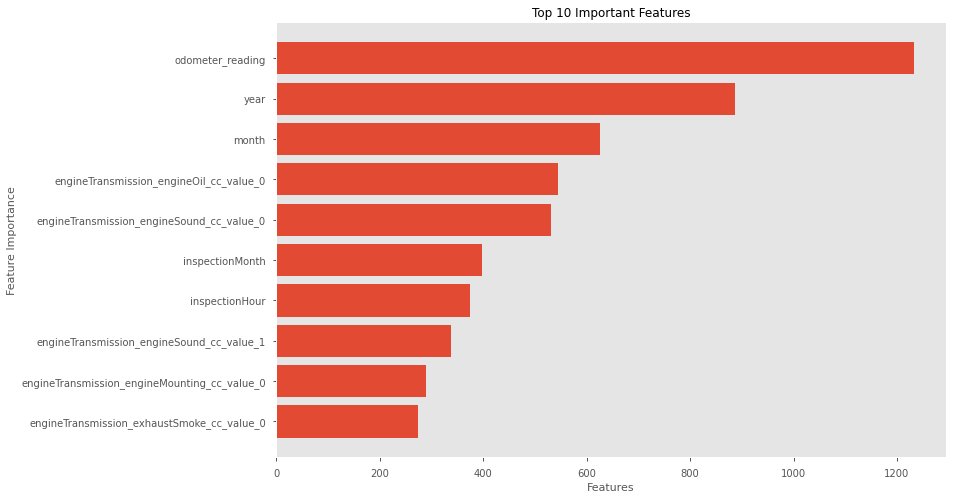

In [ ]:
# Plotting the feature importances
X = df1.drop(['rating_engineTransmission'],axis=1)
feature_importances = lgbm_best_est.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Features' : features, 'Feature_Importance' : feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Feature_Importance')

# Plotting the top 10 most important variables
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12, 8))
plt.barh(y=feat_imp_df.tail(10)['Features'], width=feat_imp_df.tail(10)['Feature_Importance'])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.grid()
plt.show()


Error Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


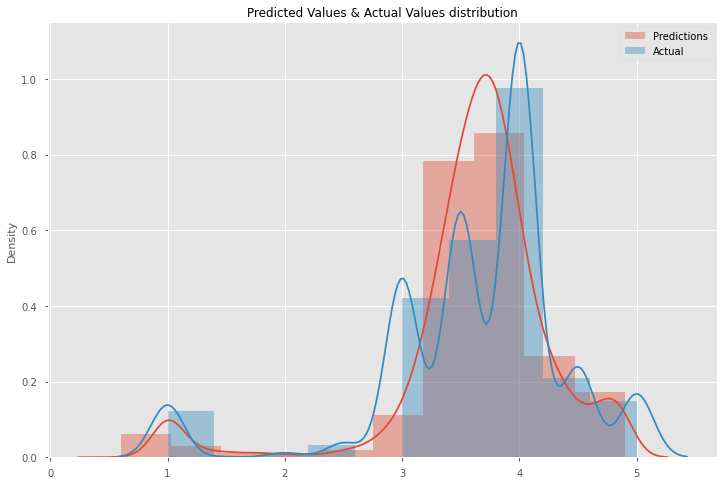

In [ ]:
# Making predictions and analysing the error
predictions = lgbm_best_est.predict(X_test)
#  Plot the distribution along with actual distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(np.round(predictions, 1), ax=ax, label='Predictions', bins=10)
sns.distplot(y_test, ax=ax, label='Actual', bins=10)
ax.set_title("Predicted Values & Actual Values distribution")
ax.legend()
plt.show()